<img src='https://user-images.githubusercontent.com/6457691/89746244-a6e2a200-daf3-11ea-9314-7863d544d73c.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 1 / NOTE 3*

# 📝 Assignment

---

## 1. Concat 

세션시간에 다뤘던 6개의 데이터를 1개로 합치세요.

데이터를 불러오기 위하여 아래의 코드를 참조하세요.

합쳐진 데이터의 이름은 `df`입니다.

```python
import pandas as pd

urlhead = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/stocks/'
df1 = pd.read_csv(urlhead + '000080.csv') 
# '000890.csv'
# '005300.csv'
# '027740.csv'
# '035810.csv'
# '136480.csv'
```



단, 모든 feature, 모든 데이터에 대해서가 아닌

- 매출액
- 자산총계
- EPS

- 제일 최근 분기의 데이터

에 대해서만 하면 됩니다.

||매출액|자산총계|EPS(원)|종목명|
|:-:|:-:|:-:|:-:|:-:|
|2020/09|6,243|10,897|453|하이트진로|
|...|...|...|...|...|
|2020/09|2,613|2,695|62|하림|

(첫부분은 값이 달라도 되며, 결과 shape는 6,4입니다.)

힌트 : 
- 데이터를 transpose
- column의 이름을 변경 및 설정
- 데이터의 일부 feature 선택
- `종목명`이라는 feature 지정
- 이후 `concat`으로 합치기
- 합친 이후의 index를 종목명으로 설정 및 drop

이라는 단계를 거치면 될겁니다.

In [1]:
import pandas as pd

stock_url = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/stocks/'

# a = pd.read_csv(data_url + '000080.csv') 
# a= a.transpose()

# new_header = a.iloc[0]
# a = a[1:]
# a.columns = new_header

def df_load(df_url):
    df = pd.read_csv(stock_url + df_url).transpose()
    new_header = df.iloc[0]
    df = df[1:]
    df.columns = new_header

    return df[-1:]

In [2]:
df1 = pd.concat([df_load('000080.csv'), df_load('000890.csv'), df_load('005300.csv'),
                 df_load('027740.csv'), df_load('035810.csv'), df_load('136480.csv')]) 

# 종목명 추가
df_type = pd.DataFrame(
       {'종목명': ['하이트진로', '보해양조', '롯데칠성', '마니커', '이지홀딩스', '하림']}
)
df_type

df1 = df1[['매출액', '자산총계', 'EPS(원)']]

In [3]:
df1.reset_index(drop=True, inplace=True)
df_type.reset_index(drop=True, inplace=True)
df = pd.concat([df1, df_type], axis = 1)
df


,매출액,자산총계,EPS(원),종목명
0,"6,243","39,617",453,하이트진로
1,205,"1,555",3,보해양조
2,"5,980","34,066","1,682",롯데칠성
3,521,"1,897",-61,마니커
4,"4,108","18,966","1,168",이지홀딩스
5,"2,613","8,550",62,하림


In [4]:
df.shape

(6, 4)


df=#1# 2. Reshape 

방금 만든 데이터를 아래 예시와 같은 **tidy** 형태로 만드세요.

이때 tidy 데이터의 이름은 `df_tidy` 입니다.

|종목명|Feature|Value|
|:-:|:-:|:-:|
|하이트진로|매출액|6243|
|보해양조|매출액|205|
|롯데칠성|매출액|5980|
|...|...|...|
|마니커|EPS(원)|-61|
|이지홀딩스|EPS(원)|1168|
|하림|EPS(원)|62|

이 후 아래의 코드를 정상적으로 실행했을때 나오는 box의 수를 `res`에 저장하세요.

```python
sns.boxplot(data = df_tidy, x = '종목명', y = 'value');
```




In [5]:
# tidy_temp = df.set_index('종목명')
df_tidy = df.melt(id_vars = '종목명', value_vars = ['매출액', '자산총계','EPS(원)'])
df_tidy

,종목명,variable,value
0,하이트진로,매출액,"6,243"
1,보해양조,매출액,205
2,롯데칠성,매출액,"5,980"
3,마니커,매출액,521
4,이지홀딩스,매출액,"4,108"
5,하림,매출액,"2,613"
6,하이트진로,자산총계,"39,617"
7,보해양조,자산총계,"1,555"
8,롯데칠성,자산총계,"34,066"
9,마니커,자산총계,"1,897"


In [6]:
# int함수
def toInt(string):
  return int(string.replace(',',''))

df_tidy['value'] = df_tidy['value'].apply(toInt)

df_tidy

,종목명,variable,value
0,하이트진로,매출액,6243
1,보해양조,매출액,205
2,롯데칠성,매출액,5980
3,마니커,매출액,521
4,이지홀딩스,매출액,4108
5,하림,매출액,2613
6,하이트진로,자산총계,39617
7,보해양조,자산총계,1555
8,롯데칠성,자산총계,34066
9,마니커,자산총계,1897


In [16]:
# 한글 글꼴 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,193 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [8]:
# 한글 글꼴
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]


[('NanumMyeongjo', '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf'),
 ('NanumSquareRound', '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf'),
 ('NanumGothic', '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'),
 ('NanumGothic', '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'),
 ('NanumBarunGothic',
  '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf'),
 ('NanumSquare', '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf'),
 ('NanumMyeongjo', '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'),
 ('NanumSquareRound', '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf'),
 ('NanumBarunGothic', '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'),
 ('NanumSquare', '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf')]

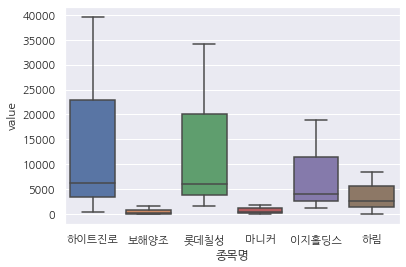

In [9]:
import seaborn as sns
sns.set(font="NanumGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')
sns.boxplot(data = df_tidy, x = '종목명', y='value');

In [10]:
res = 6

## 3. Merge & Join +

pandas merge의 options중 how 에는 여러가지 옵션들이 있습니다.

공식 레퍼런스를 검색, 참조하여

아래 코드를 바탕으로 

다음과 같은 결과물을 만드는 코드를 작성하세요

변수의 이름은 `df2` 입니다.

|key1|key2|A|B|C|D|
|:-:|:-:|:-:|:-:|:-:|:-:|
|K0|K0|A0|B0|C0|D0|
|K0|K1|A1|B1|NaN|NaN|
|K1|K0|A2|B2|C1|D1|
|K1|K0|A2|B2|C2|D2|
|K2|K1|A3|B3|NaN|NaN|





In [12]:
import pandas as pd

left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                      'key2': ['K0', 'K0', 'K0', 'K0'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})

In [13]:
right
left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [14]:
df2 = pd.merge(left, right, how = 'left', on = ['key1', 'key2'])
df2

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


## Grading

이전 과제를 완료했다면, 아래의 코드를 실행하세요. 

In [15]:
import numpy as np

def grade(df, df2, df_tidy, res):
  score = 0
  score += (df['매출액'][2] == 5980) #
  score += (df['자산총계'][3] == 1897) #
  score += (df2.equals(pd.DataFrame({ #
    'key1' : ['K0', 'K0', 'K1', 'K1', 'K2'],
    'key2' : ['K0', 'K1', 'K0', 'K0', 'K1'],
    'A' : ['A0', 'A1', 'A2', 'A2', 'A3'],
    'B' : ['B0', 'B1', 'B2', 'B2', 'B3'],
    'C' : ['C0', np.NaN, 'C1', 'C2', np.NaN],
    'D' : ['D0', np.NaN, 'D1', 'D2', np.NaN],
  }))) 
  score += (res == 6) #
  score += (round(df_tidy['value'].mean(), 3) == 7090.444)
  return(score)

In [16]:
grade(df, df2, df_tidy, res)

3

In [18]:
round(df_tidy['value'].mean(),3)

7090.444

## 🔥 도전과제

아래 링크들을 참조하여, 
특정 테마별로 포함되어 있는 종목의 데이터를 직접 csv형태로 수집하고 (아래 적힌 3개씩)

<https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=408>

<https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=36>

- 최종 분기에 해당하는 데이터

- 테마별 평균 데이터를 결과물로 만드는 코드를 작성하세요.

단, 모든 feature에 대해서가 아닌

- 매출액
- 자산총계
- EPS

에 대해서만 하면 됩니다.

|종목명|매출액|자산총계|EPS|
|:-:|:-:|:-:|:-:|
|대한해운|...|...|...|...|
|팬오션|...|...|...|...|
|KSS해운|...|...|...|...|
|세미콘라이트|...|...|...|...|
|오성첨단소재|...|...|...|...|
|에이아이비트|...|...|...|...|

---

|테마|매출액|자산총계|EPS|
|:-:|:-:|:-:|:-:|
|해운|...|...|...|
|마리화나(대마)|...|...|...|

이후 아래의 예시 처럼 seaborn을 사용하여 결과를 barplot으로 시각화하세요.

단, 한글이 깨지는 에러를 여러분이 직접 고쳐야합니다.

In [31]:
import pandas as pd
import seaborn as sns



dat = pd.DataFrame({
    'name' : ['해운', '대마'],
    'value' : [10000,5000]
})

In [ ]:
# marijuana = pd.DataFrame(
#     {'종목' : ['한국비엔씨', '우리바이오', '오성첨단소재', '에이아이비트', '뉴프라이드', '마이더스AI', '에스엘바이오닉스'],
#      '매출액' : [194, 16234, 796, 292, 398, 82, 286],
#      '자산총계': [676, 6461, 2572, 581, 1152, 454, 648],
#      'EPS': [28, 375, 162, -221, -1423, -209, -8]
#     ]}
# )
# marijuana = pd.DataFrame(
#     {'종목' : ['HMM', '흥아해운', '팬오션', '대한해운', 'KSS해운'],
#      '매출액' : [194, 16234, 796, 292, 398],
#      '자산총계': [676, 6461, 2572, 581, 1152],
#      'EPS': [28, 375, 162, -221, -1423]
#     ]}
# )

In [8]:
finance_url = 'https://github.com/deardanny/ds-section1-sprint1/blob/e33376b1fbf6b9ab2f72612864c9e89b273205fc/data/finance_data.xls'
finance_data = pd.read_excel(finance_url)

HTTPError: ignored

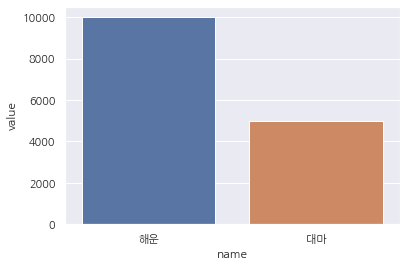

In [32]:
sns.barplot(x = 'name', y = 'value', data = dat);